In [ ]:
import pandas as pd
data = pd.read_csv("student-mat.csv", sep = ';')
data.head()


In [ ]:
binary_map = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'F': 0, 'M': 1},
    'address': {'R': 0, 'U': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'A': 0, 'T': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1},
}
for col , maping in binary_map.items():
    data[col] = data[col].map(maping)
data.head()

In [20]:
from sklearn.model_selection import train_test_split
features = ['school', 'sex', 'age', 'address', 'Pstatus', 'famsize', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'absences', 'health', 'Dalc', 'Walc', 'G1', 'G2' ]
X = data[features].values
y = (data['G3'] >= 10).astype(int).values  # 1 = Pass, 0 = Fail
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import dtree
tree = dtree.build_tree(X_train, y_train, max_depth= 6)


In [22]:
y_pred = dtree.predict(tree, X_test)
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.8734177215189873
Confusion Matrix:
[[22  5]
 [ 5 47]]


In [23]:
with open("depth_vs_accuracy.txt", "w") as f:
    for depth in range(1, 30):  # try depths from 1 to 15
        tree = dtree.build_tree(X_train, y_train, max_depth=depth)
        y_pred = dtree.predict(tree, X_test)
        acc = accuracy_score(y_test, y_pred)
        f.write(f"Depth: {depth}, Accuracy: {acc:.4f}\n")
        print(f"Depth: {depth}, Accuracy: {acc:.4f}")

Depth: 1, Accuracy: 0.9114
Depth: 2, Accuracy: 0.9114
Depth: 3, Accuracy: 0.8481
Depth: 4, Accuracy: 0.8608
Depth: 5, Accuracy: 0.8987
Depth: 6, Accuracy: 0.8734
Depth: 7, Accuracy: 0.8734
Depth: 8, Accuracy: 0.8734
Depth: 9, Accuracy: 0.8734
Depth: 10, Accuracy: 0.8734
Depth: 11, Accuracy: 0.8734
Depth: 12, Accuracy: 0.8734
Depth: 13, Accuracy: 0.8734
Depth: 14, Accuracy: 0.8734
Depth: 15, Accuracy: 0.8734
Depth: 16, Accuracy: 0.8734
Depth: 17, Accuracy: 0.8734
Depth: 18, Accuracy: 0.8734
Depth: 19, Accuracy: 0.8734
Depth: 20, Accuracy: 0.8734
Depth: 21, Accuracy: 0.8734
Depth: 22, Accuracy: 0.8734
Depth: 23, Accuracy: 0.8734
Depth: 24, Accuracy: 0.8734
Depth: 25, Accuracy: 0.8734
Depth: 26, Accuracy: 0.8734
Depth: 27, Accuracy: 0.8734
Depth: 28, Accuracy: 0.8734
Depth: 29, Accuracy: 0.8734


In [70]:
features = [ 'age',  'studytime', 'failures', 'schoolsup', 'famsup',  'nursery',  'internet', 'romantic',  'health',  'Walc', 'G1', 'G2']
X = data[features].values
y = (data['G3'] >= 10).astype(int).values  # 1 = Pass, 0 = Fail
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
with open("depth_vs_accuracy2.txt", "w") as f:
    for depth in range(1, 30):  # try depths from 1 to 15
        tree = dtree.build_tree(X_train, y_train, max_depth=depth)
        y_pred = dtree.predict(tree, X_test)
        acc = accuracy_score(y_test, y_pred)
        f.write(f"Depth: {depth}, Accuracy: {acc:.4f}\n")
        print(f"Depth: {depth}, Accuracy: {acc:.4f}")

Depth: 1, Accuracy: 0.9114
Depth: 2, Accuracy: 0.9114
Depth: 3, Accuracy: 0.9114
Depth: 4, Accuracy: 0.9114
Depth: 5, Accuracy: 0.8861
Depth: 6, Accuracy: 0.8987
Depth: 7, Accuracy: 0.8861
Depth: 8, Accuracy: 0.8861
Depth: 9, Accuracy: 0.8861
Depth: 10, Accuracy: 0.8861
Depth: 11, Accuracy: 0.8861
Depth: 12, Accuracy: 0.8861
Depth: 13, Accuracy: 0.8861
Depth: 14, Accuracy: 0.8861
Depth: 15, Accuracy: 0.8861
Depth: 16, Accuracy: 0.8861
Depth: 17, Accuracy: 0.8861
Depth: 18, Accuracy: 0.8861
Depth: 19, Accuracy: 0.8861
Depth: 20, Accuracy: 0.8861
Depth: 21, Accuracy: 0.8861
Depth: 22, Accuracy: 0.8861
Depth: 23, Accuracy: 0.8861
Depth: 24, Accuracy: 0.8861
Depth: 25, Accuracy: 0.8861
Depth: 26, Accuracy: 0.8861
Depth: 27, Accuracy: 0.8861
Depth: 28, Accuracy: 0.8861
Depth: 29, Accuracy: 0.8861


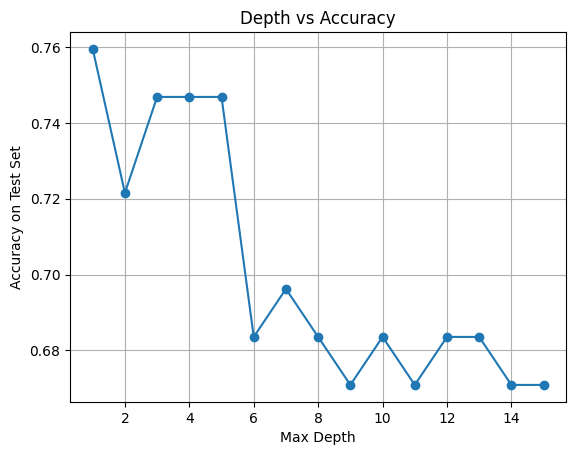

In [ ]:
import matplotlib.pyplot as plt
features = [ 'age',  'studytime','Medu', 'Fedu', 'failures', 'schoolsup', 'famsup',  'nursery',  'internet', 'romantic',  'health',  'Walc']
X = data[features].values
y = (data['G3'] >= 10).astype(int).values  # 1 = Pass, 0 = Fail
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = list(range(1, 16))
accuracies = []

for depth in depths:
    tree = dtree.build_tree(X_train, y_train, max_depth=depth)
    y_pred = dtree.predict(tree, X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(depths, accuracies, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy on Test Set")
plt.title("Depth vs Accuracy")
plt.grid(True)
plt.show()


In [ ]:
features = [ 'age',  'studytime', 'failures', 'schoolsup', 'famsup',  'nursery',  'internet', 'romantic',  'health',  'Walc', 'G1', 'G2']
X = data[features].values
y = (data['G3'] >= 10).astype(int).values  # 1 = Pass, 0 = Fail
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
with open("depth_vs_accuracy2.txt", "w") as f:
    for depth in range(1, 30):  # try depths from 1 to 15
        tree = dtree.build_tree(X_train, y_train, max_depth=depth)
        y_pred = dtree.predict(tree, X_test)
        acc = accuracy_score(y_test, y_pred)
        f.write(f"Depth: {depth}, Accuracy: {acc:.4f}\n")
        print(f"Depth: {depth}, Accuracy: {acc:.4f}")

Depth: 1, Accuracy: 0.9114
Depth: 2, Accuracy: 0.9114
Depth: 3, Accuracy: 0.9114
Depth: 4, Accuracy: 0.9114
Depth: 5, Accuracy: 0.9114
Depth: 6, Accuracy: 0.9114
Depth: 7, Accuracy: 0.9114
Depth: 8, Accuracy: 0.9114
Depth: 9, Accuracy: 0.9114
Depth: 10, Accuracy: 0.9114
Depth: 11, Accuracy: 0.9114
Depth: 12, Accuracy: 0.9114
Depth: 13, Accuracy: 0.9114
Depth: 14, Accuracy: 0.9114
Depth: 15, Accuracy: 0.9114
Depth: 16, Accuracy: 0.9114
Depth: 17, Accuracy: 0.9114
Depth: 18, Accuracy: 0.9114
Depth: 19, Accuracy: 0.9114
Depth: 20, Accuracy: 0.9114
Depth: 21, Accuracy: 0.9114
Depth: 22, Accuracy: 0.9114
Depth: 23, Accuracy: 0.9114
Depth: 24, Accuracy: 0.9114
Depth: 25, Accuracy: 0.9114
Depth: 26, Accuracy: 0.9114
Depth: 27, Accuracy: 0.9114
Depth: 28, Accuracy: 0.9114
Depth: 29, Accuracy: 0.9114
